In [2]:
# importing liberires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot
from iso3166 import countries
from datetime import datetime, timedelta
import plotly.express as px

In [3]:
df= pd.read_csv("C:/Users/surya/Downloads/space_corrected.csv")
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [4]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [6]:
df['DateTime'] = pd.to_datetime(df['Datum'])

In [7]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00


In [8]:
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957


In [9]:
df['month'] = df['DateTime'].apply(lambda datetime: datetime.month)
#getting the date of launch ( in a month )
df['Date']=df['Datum'].apply(lambda datum: datum.split()[2][:2]).astype(int)
#getting the hour of launch
df['Hour']=df['Datum'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8,6,4.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7,30,21.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7,30,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,2,5,7.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,2,1,3.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,12,6,16.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,11,3,2.0


In [10]:
#getting the country of launch
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8,6,4.0,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7,30,21.0,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7,30,11.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,2,5,7.0,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,2,1,3.0,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,12,6,16.0,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,11,3,2.0,Kazakhstan


In [11]:
#getting the launch day of week
df['Day']=df['Datum'].apply(lambda datum: datum.split()[0])
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour,Country,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0,USA,Fri
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8,6,4.0,China,Thu
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0,USA,Tue
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7,30,21.0,Kazakhstan,Thu
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7,30,11.0,USA,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,2,5,7.0,USA,Wed
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,2,1,3.0,USA,Sat
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,12,6,16.0,USA,Fri
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,11,3,2.0,Kazakhstan,Sun


In [12]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': "Korea, Democratic People's Republic of",
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of'}
for country in list_countries:
    df.Country = df.Country.replace(country, list_countries[country])
    

In [13]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour,Country,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0,USA,Fri
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8,6,4.0,China,Thu
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0,USA,Tue
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7,30,21.0,Kazakhstan,Thu
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7,30,11.0,USA,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,2,5,7.0,USA,Wed
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,2,1,3.0,USA,Sat
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,12,6,16.0,USA,Fri
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,11,3,2.0,Kazakhstan,Sun


In [14]:
df=df.fillna(0)
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour,Country,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0,USA,Fri
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,8,6,4.0,China,Thu
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0,USA,Tue
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,7,30,21.0,Kazakhstan,Thu
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,7,30,11.0,USA,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,1958-02-05 07:33:00+00:00,1958,2,5,7.0,USA,Wed
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,1958-02-01 03:48:00+00:00,1958,2,1,3.0,USA,Sat
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,1957-12-06 16:44:00+00:00,1957,12,6,16.0,USA,Fri
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,1957-11-03 02:30:00+00:00,1957,11,3,2.0,Kazakhstan,Sun


<AxesSubplot:title={'center':'No. of rocket launchs by every country'}, xlabel='count', ylabel='Company Name'>

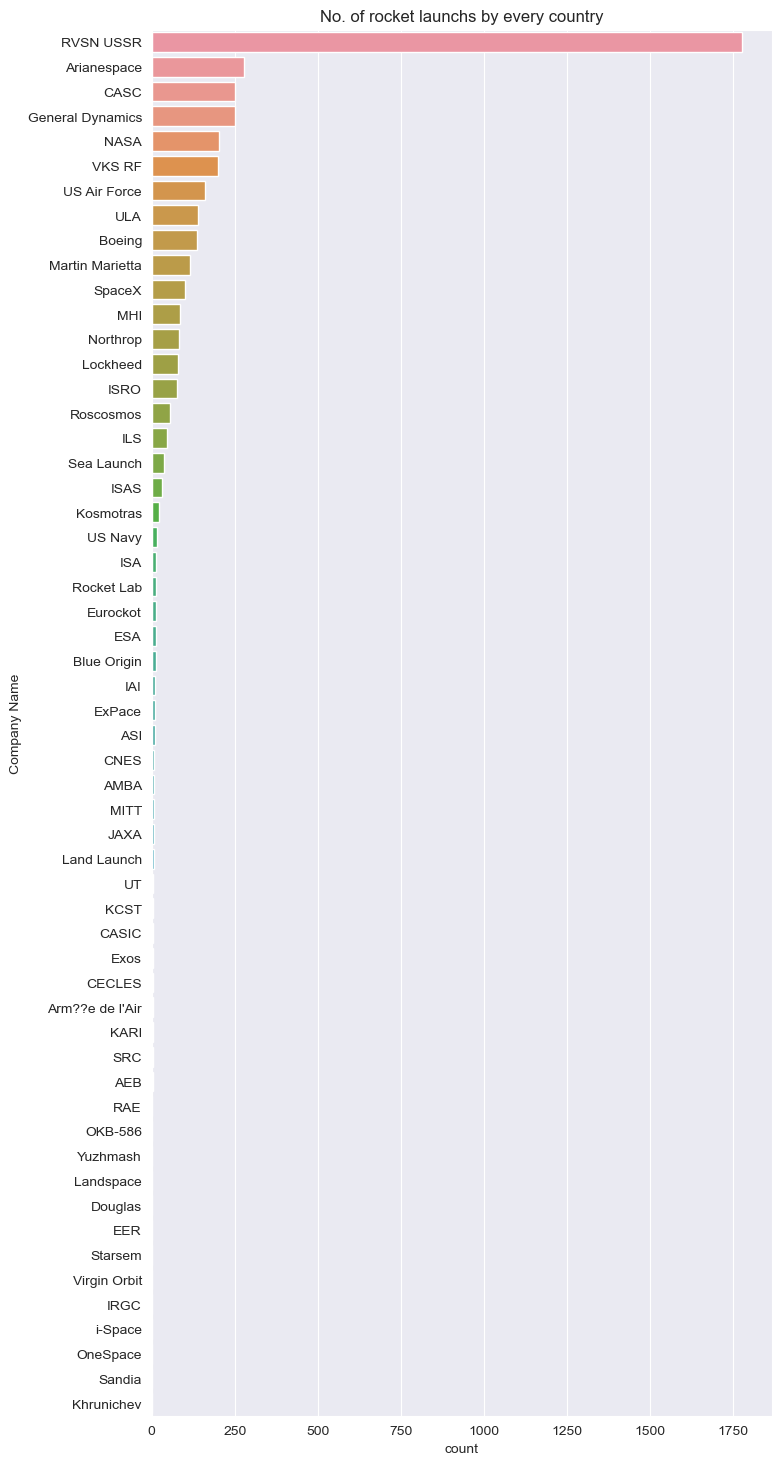

In [32]:
plt.figure(figsize=(8,18))
plt.title('No. of rocket launchs by every country')
sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)

(0.0, 1500.0)

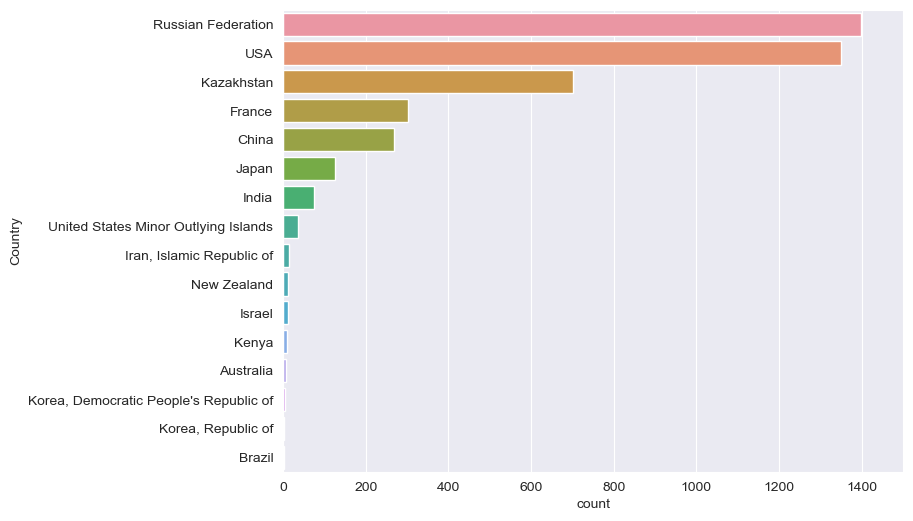

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
plt.xlim(0,1500)

<AxesSubplot:title={'center':'Location wise No. of rocket launchs'}, xlabel='count', ylabel='Location'>

c:\Users\surya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 129 (\x81) missing from current font.



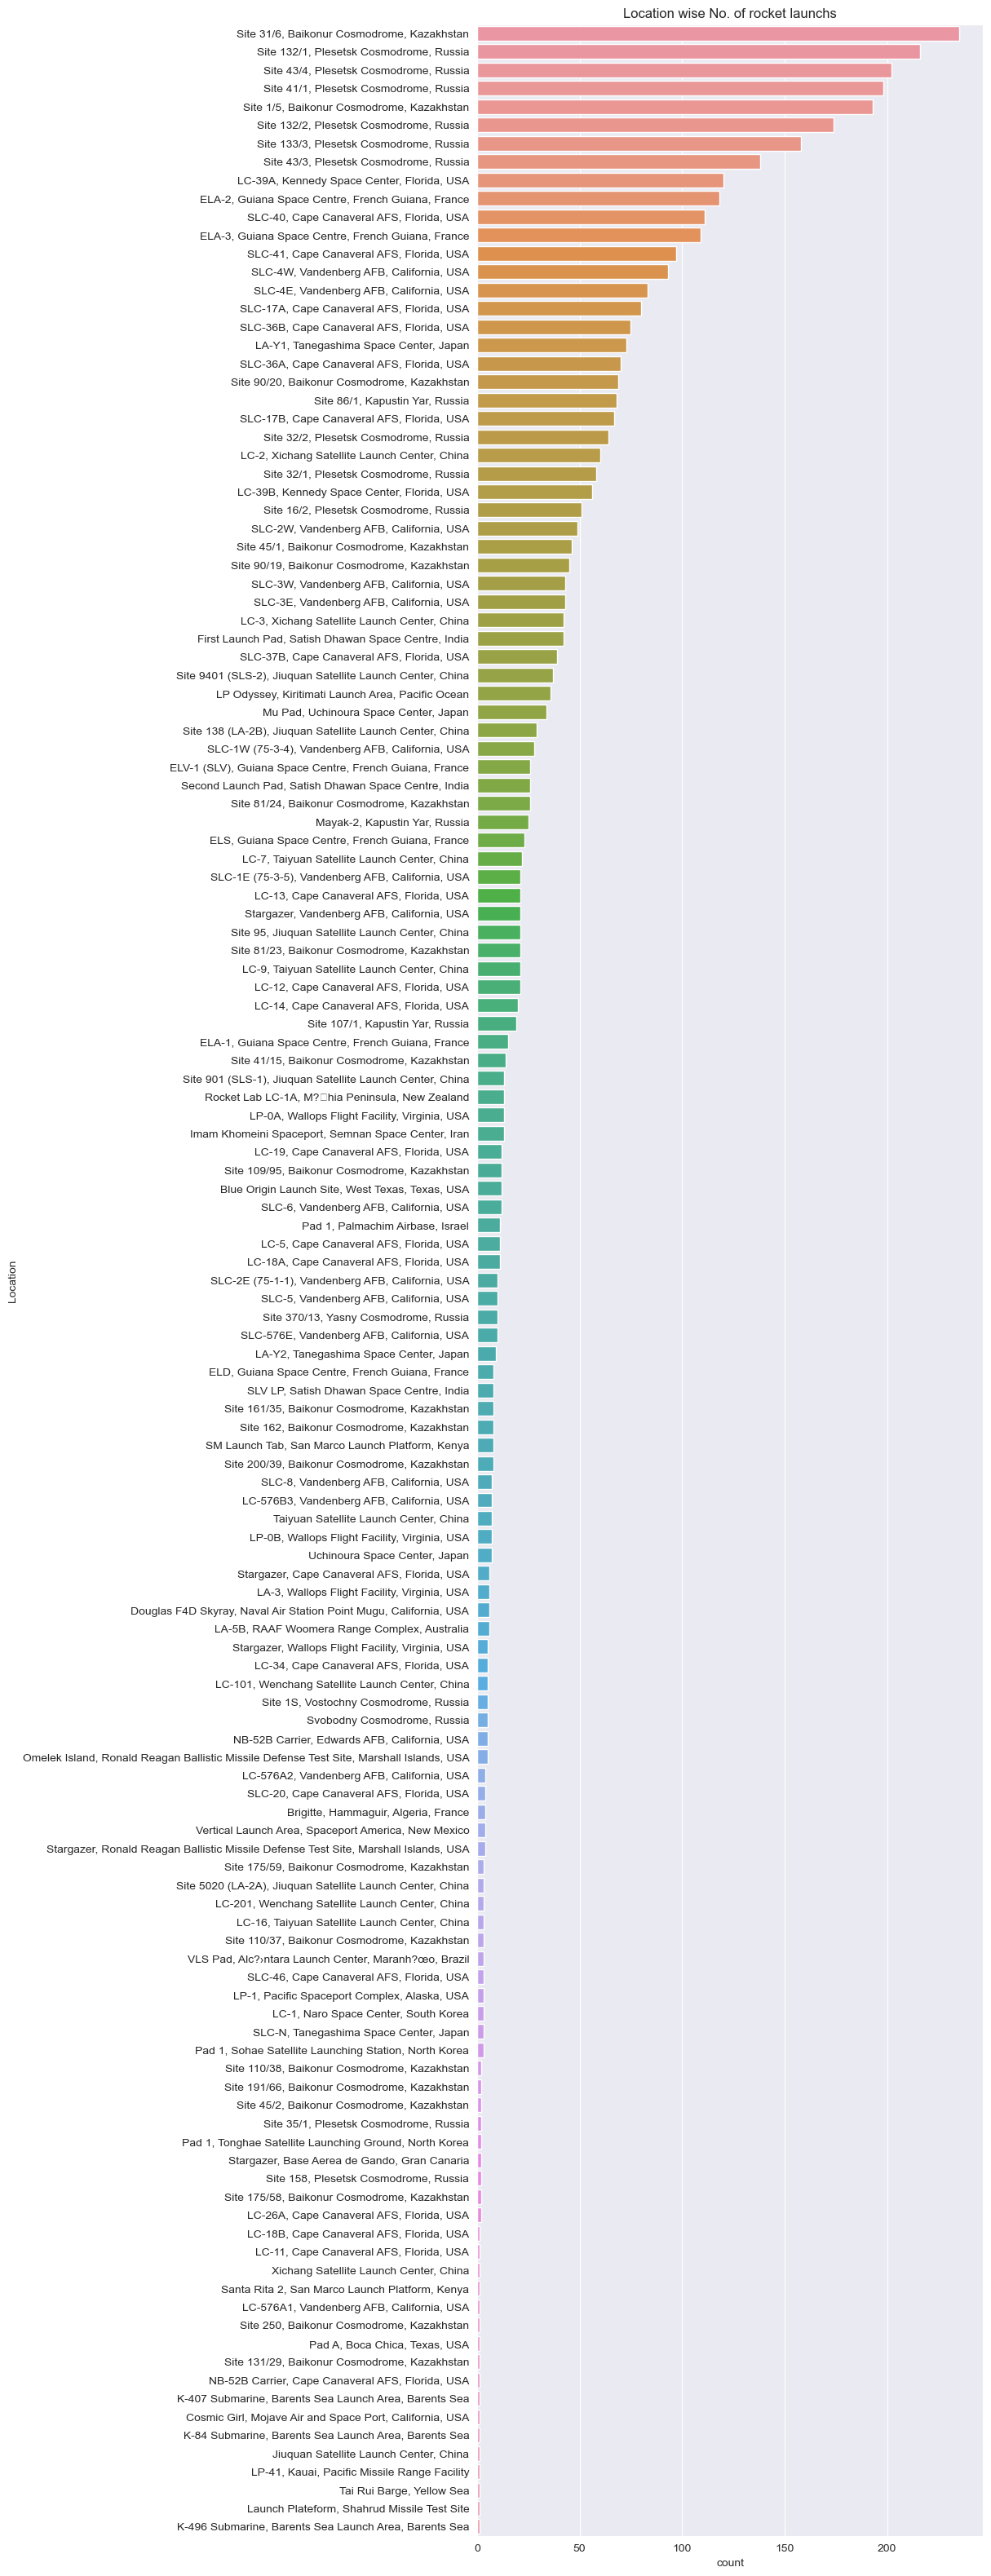

In [33]:
plt.figure(figsize=(8,40))
plt.title('Location wise No. of rocket launchs')
sns.countplot(y="Location", data=df, order=df["Location"].value_counts().index)

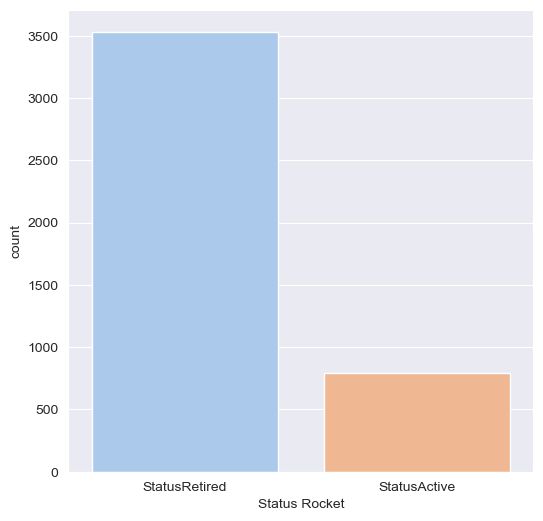

In [18]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Status Rocket", data=df, order=df["Status Rocket"].value_counts().index, palette="pastel")

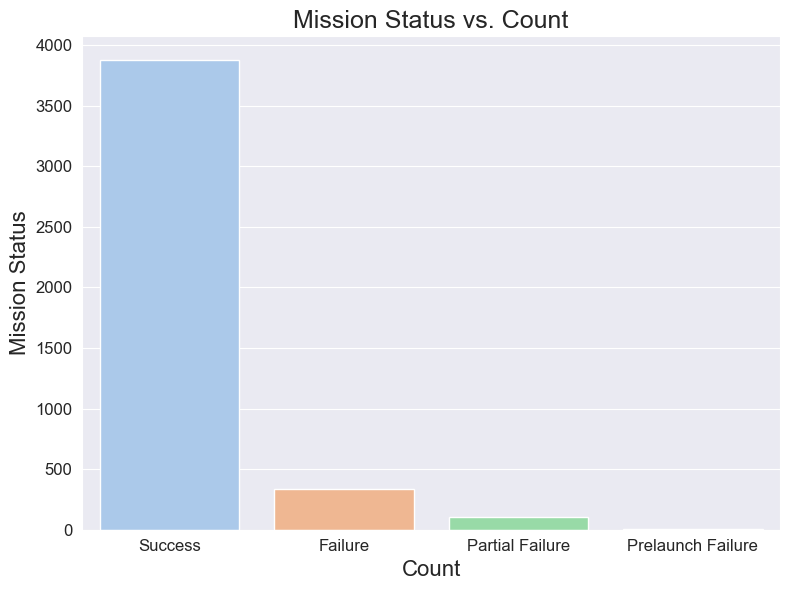

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Status Mission", data=df, order=df["Status Mission"].value_counts().index, palette="pastel")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

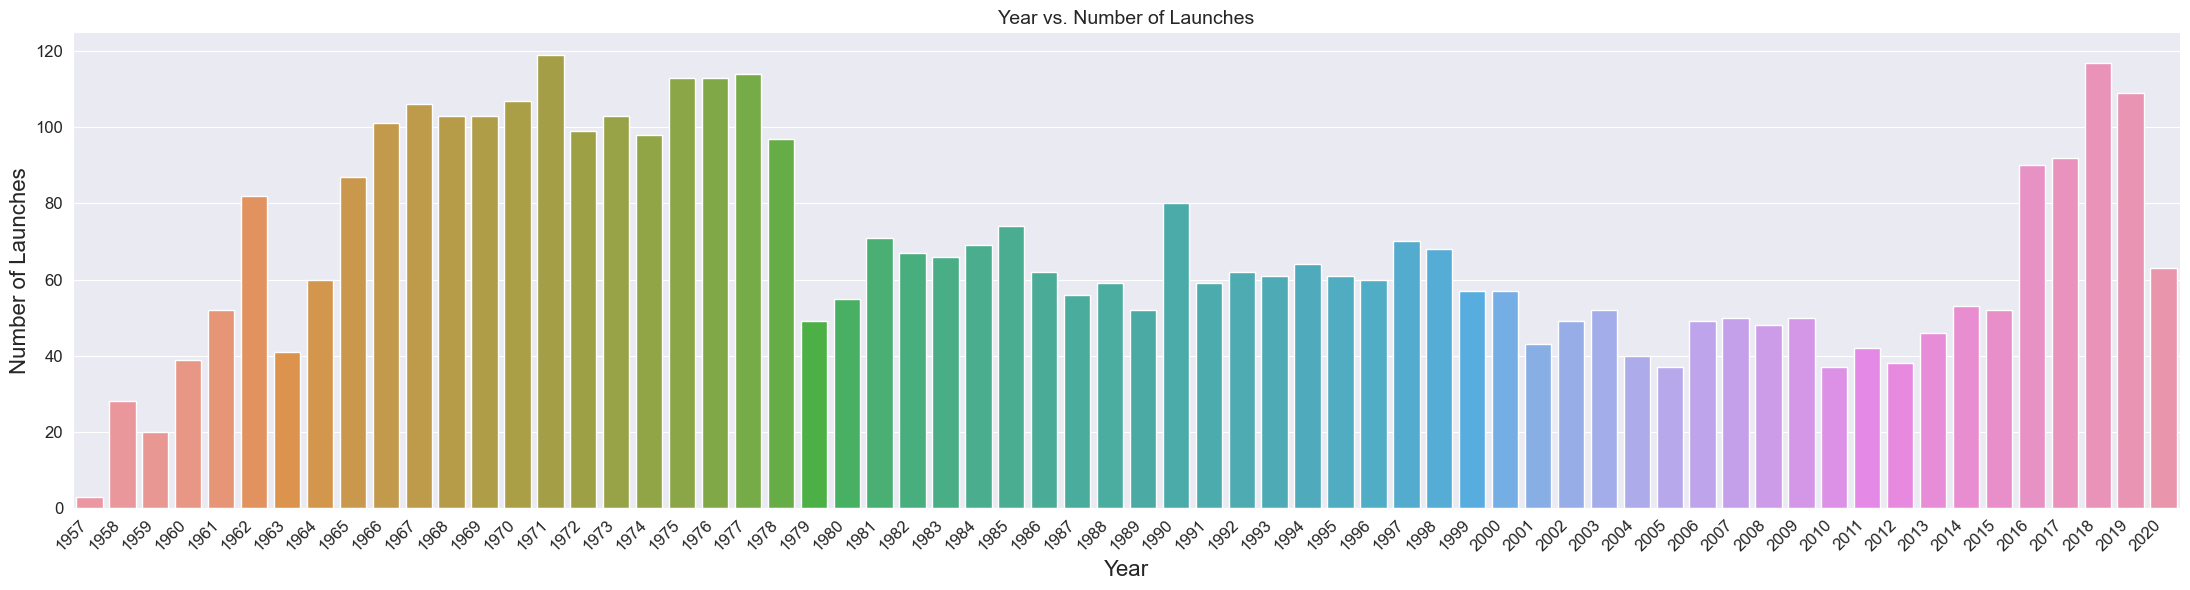

In [20]:
plt.figure(figsize=(22,6))
ax = sns.countplot(x=df['Year'])
ax.axes.set_title("Year vs. Number of Launches",fontsize=14)
ax.set_xlabel("Year",fontsize=16,loc="center")
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

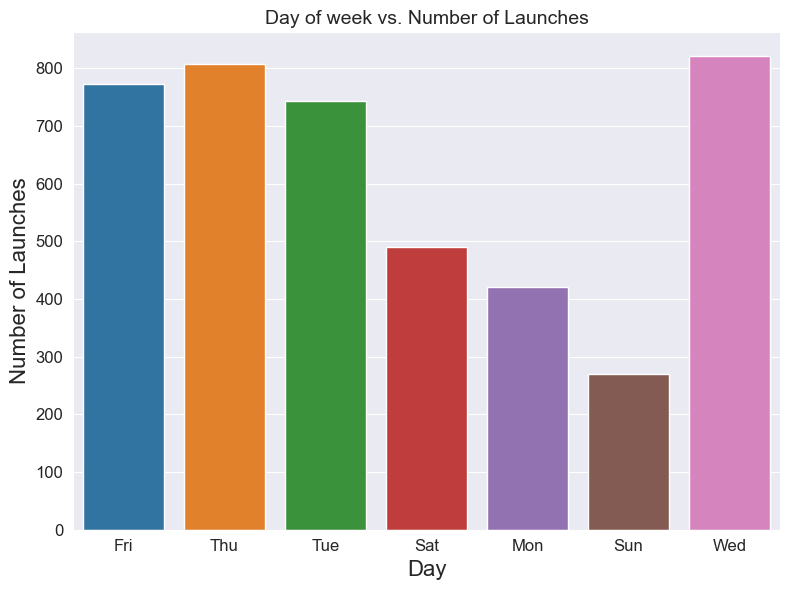

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['Day'])
ax.axes.set_title("Day of week vs. Number of Launches",fontsize=14)
ax.set_xlabel("Day",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

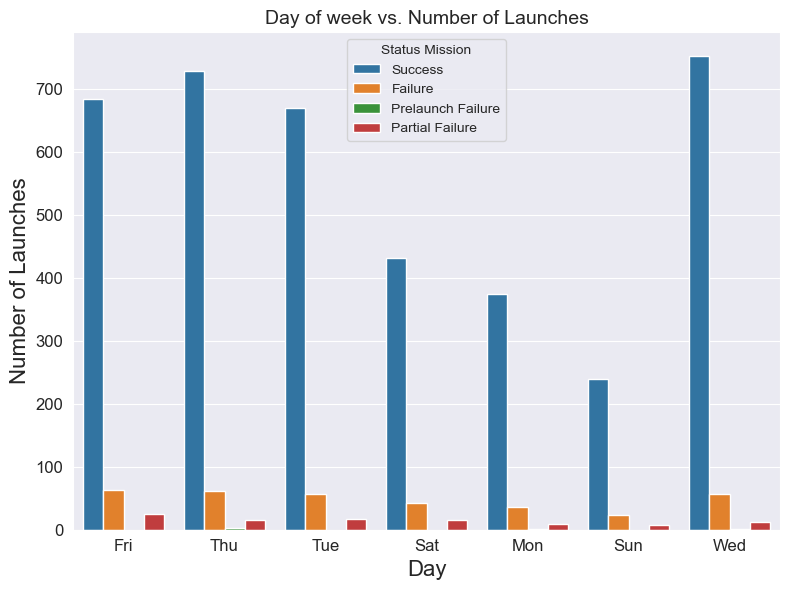

In [22]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Day',hue="Status Mission",data= df)
ax.axes.set_title("Day of week vs. Number of Launches",fontsize=14)
ax.set_xlabel("Day",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
# plt.ylim(0,100)
plt.show()

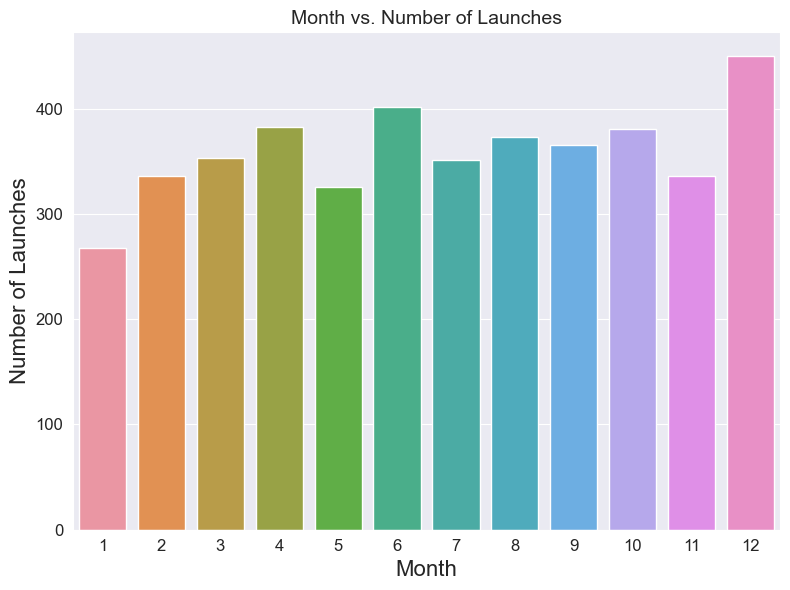

In [23]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='month',data= df)
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [24]:
# plt.figure(figsize=(10,60))
fig = px.sunburst(df,path = ["Company Name", "Status Mission", "Status Rocket"], title = "Sunburst Chart",width=900, height=800)
fig.show()

In [25]:
df_imp = df[(df["Country"] == "USA") | (df["Country"] == "Russian Federation") | (df["Country"] == "India") | (df["Country"] == "France")]

In [26]:
test = pd.DataFrame(df_imp.groupby(["Country","Company Name"])["Location"].count())
test.rename(columns={"Location":"Mission Numbers"}, inplace=True)

In [27]:
test = test.reset_index()
fig = px.bar(test, x="Mission Numbers", y="Country",
             color='Company Name', text="Company Name")
fig.update_layout(
    title='Mission Numbers by Countries and Corp Names',
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig.show()

In [28]:
spacex=df[df['Company Name']=='SpaceX']
spacex

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,month,Date,Hour,Country,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,8,7,5.0,USA,Fri
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020,8,4,23.0,USA,Tue
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20 21:30:00+00:00,2020,7,20,21.0,USA,Mon
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success,2020-06-30 20:10:00+00:00,2020,6,30,20.0,USA,Tue
20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success,2020-06-13 09:21:00+00:00,2020,6,13,9.0,USA,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Tue Jul 14, 2009 03:35 UTC",Falcon 1 | RazakSat,StatusRetired,7.0,Success,2009-07-14 03:35:00+00:00,2009,7,14,3.0,USA,Tue
800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.0,Success,2008-09-28 23:15:00+00:00,2008,9,28,23.0,USA,Sun
808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Aug 03, 2008 03:34 UTC",Falcon 1 | Flight 3,StatusRetired,7.0,Failure,2008-08-03 03:34:00+00:00,2008,8,3,3.0,USA,Sun
879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Wed Mar 21, 2007 01:10 UTC",Falcon 1 | DemoSat,StatusRetired,7.0,Failure,2007-03-21 01:10:00+00:00,2007,3,21,1.0,USA,Wed


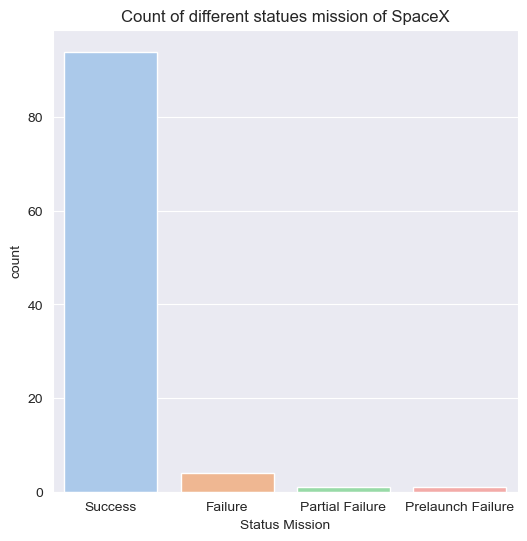

In [35]:
plt.figure(figsize=(6,6))
plt.title('Count of different statues mission of SpaceX')
ax = sns.countplot(x="Status Mission", data=spacex, order=df["Status Mission"].value_counts().index, palette="pastel")

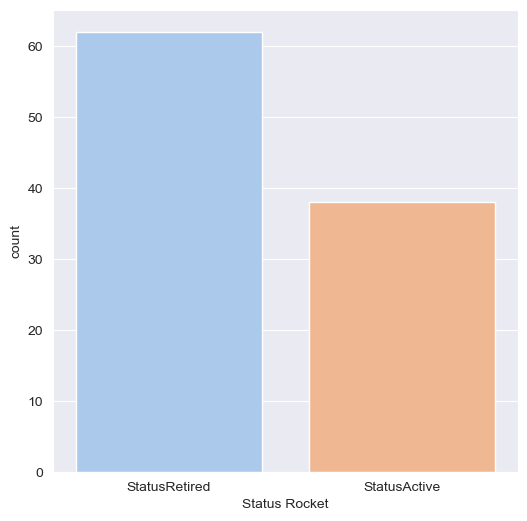

In [30]:
plt.figure(figsize=(6,6))

ax = sns.countplot(x="Status Rocket", data=spacex, order=df["Status Rocket"].value_counts().index, palette="pastel")

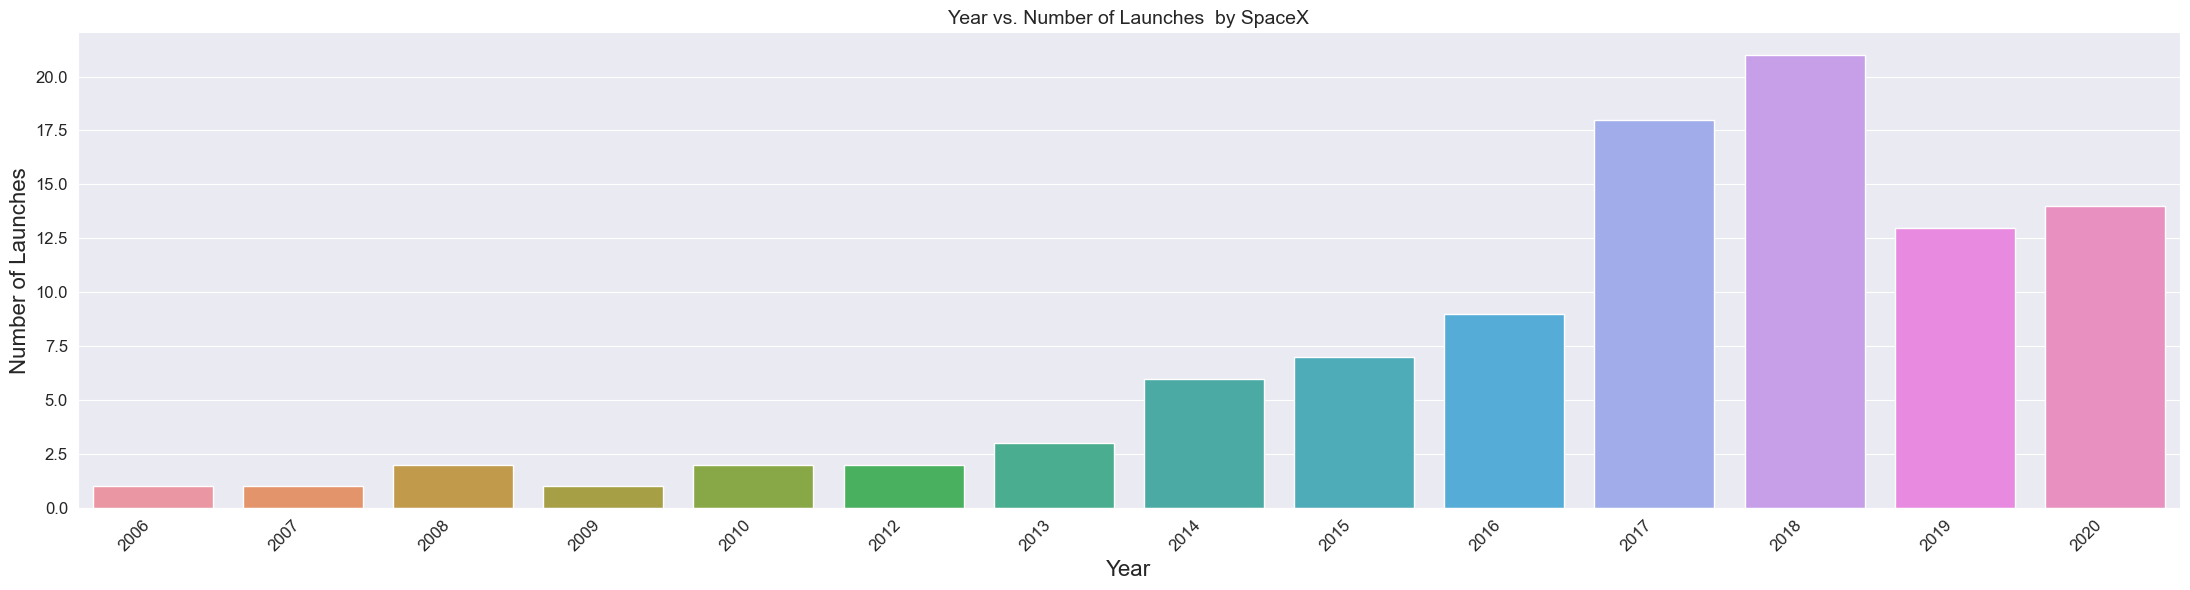

In [31]:
plt.figure(figsize=(22,6))
ax = sns.countplot(x=spacex['Year'])
ax.axes.set_title("Year vs. Number of Launches  by SpaceX",fontsize=14)
ax.set_xlabel("Year",fontsize=16,loc="center")
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()